# Asg-4 imports 


In [556]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.AnimatePDA import *
from jove.Def_PDA    import *
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## Question 1: 
 

Prove that this language is not regular 

$L_{if} = \{ a^i b^j c^k \;:\; i,j,k\ge 0,\; {\rm and}\; {\rm if}\; (i=2)\; {\rm then}\; (j=k)  \}$

Hint: Consider the reverse of $L_{if}$ calling it the language $LR_{if}$, prove that $LR_{if}$ is non-regular using the Pumping Lemma. Then, justify why this means that $L_{if}$ is non-regular.


ANSWER 

- Consider the reverse of $L_{if}$, called $LR_{if}$
- Consider a $w$ in $LR_{if}$
- Let $w = c^{N/2}b^{N/2}a^2 = xyz, |xy| \leq N, y \neq \epsilon$
  1. $x = c^{N/2}$
  2. $y = b^{N/2}$
  3. $z = a^2$
- We pump $y$ down such that $w = xy^0z$, and we find that $j \neq k$, thus the string $xy^0z \notin LR_{if}$, thus $LR_{if}$ is not regular by the pumping lemma.
- The reverse of $L_{if}$ is not regular, therefore $L_{if}$ is not regular.

## Question 2:

Prove that language $Add$ is not regular 

Add = {x = y + z where x, y, and z are binary numbers and the addition yields correct result}
          
More examples of strings in the language $Add$ are below:

* String s1 = "$101=10+11$" 

* String s2 = "$1000 = 100 + 100$"

* String s3 = "$1011 = 110 + 101$"

ANSWER

- Consider a $w \in Add$, where $x=y$, $x$ and $y$ are both binary numbers consisting of only $1$'s, and $z$ is the number $0$
- More specifically, let $w = "1^{N} = 1^N + 0"$
- We view $w$ as $xy^iz$ such that:
  1. $x = \epsilon$
  2. $y = 1^N$
  3. $z = "= \{1^N\} + 0"$
  4. $|xy| = N$
- We set $i = 2$, such that $xy^iz = xy^2z = "1^{2N} = 1^N + 0"$.
- $1^{2N} \neq 1^N \therefore xy^2z \notin Add \therefore$ $Add$ is not regular by the pumping lemma

## Question 3:

Design a PDA called "a2b" for the language $\{a^i b^j : i,j\ge 0, {\rm and}\; j = 2i \}$.
- Some strings in such language are: $abb$, $aabbbb$, $aaabbbbbb$, etc.
- Put a "header block" of comments (before you list the PDA transitions) that describes the overall stacking strategy. For example:
  - !! The PDA uses the stack in THIS WAY while a's arrive
  - !! Then when b's arrive, the PDA does THIS
  - !! After b's, if $a$'s arrive, the PDA does THIS
- After that, fully document your design (line by line)
- Then, test your PDA on these strings
  1. $\varepsilon$ (accept)

  2. $abb$ (accept)

  3. $aabbbb$ (accept)

  4. $aaabbbbbb$ (accept)

  5. $ab$ (reject)

  6. $b$ (reject)

  7. $aba$ (reject)

  8. $abba$ (reject)
- Finally, add two more accepting and two more rejecting tests of your own.

### Given test cases:

In [557]:
a2b = md2mc('''
PDA

!! Overall Algorithm:

!! For every 'a' received, push 'aa' on to the stack, 
!! then pop the top 'a' every time a 'b' is received.
!! No a's are accepted after b's (because b's are never pushed)

!! Now a line-by-line description
IF : a, #; aa# -> A  !! push 'aa' when stack top has # and a single 'a' is read
A  : a, a; aaa -> A  !! push 'aa' when stack top has 'a' and an 'a' is read
A  : b, a; '' -> A   !! cancel the top 'a' and incoming 'b' and push nothing
A  : '',#; #  -> IF  !! accept if stack is empty

''')

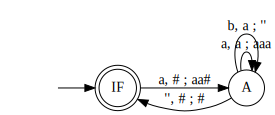

In [558]:
dotObj_pda(a2b)

In [559]:
explore_pda('', a2b)

String  accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', '', '#') .


In [560]:
explore_pda('abb', a2b)

String abb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', 'abb', '#')
->  ('A', 'bb', 'aa#')
->  ('A', 'b', 'a#')
->  ('A', '', '#')
->  ('IF', '', '#') .


In [561]:
explore_pda('aabbbb', a2b)

String aabbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', 'aabbbb', '#')
->  ('A', 'abbbb', 'aa#')
->  ('A', 'bbbb', 'aaaa#')
->  ('A', 'bbb', 'aaa#')
->  ('A', 'bb', 'aa#')
->  ('A', 'b', 'a#')
->  ('A', '', '#')
->  ('IF', '', '#') .


In [562]:
explore_pda('aaabbbbbb', a2b)

String aaabbbbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', 'aaabbbbbb', '#')
->  ('A', 'aabbbbbb', 'aa#')
->  ('A', 'abbbbbb', 'aaaa#')
->  ('A', 'bbbbbb', 'aaaaaa#')
->  ('A', 'bbbbb', 'aaaaa#')
->  ('A', 'bbbb', 'aaaa#')
->  ('A', 'bbb', 'aaa#')
->  ('A', 'bb', 'aa#')
->  ('A', 'b', 'a#')
->  ('A', '', '#')
->  ('IF', '', '#') .


In [563]:
explore_pda('ab', a2b)

String ab rejected by your PDA :-(
Visited states are:
{('A', 'b', 'aa#'), ('IF', 'ab', '#'), ('A', '', 'a#')}


In [564]:
explore_pda('b', a2b)

String b rejected by your PDA :-(
Visited states are:
{('IF', 'b', '#')}


In [565]:
explore_pda('aba', a2b)

String aba rejected by your PDA :-(
Visited states are:
{('A', 'a', 'a#'), ('A', '', 'aaa#'), ('A', 'ba', 'aa#'), ('IF', 'aba', '#')}


In [566]:
explore_pda('abba', a2b)

String abba rejected by your PDA :-(
Visited states are:
{('A', 'ba', 'a#'), ('A', '', 'aa#'), ('A', 'a', '#'), ('IF', 'abba', '#'), ('IF', 'a', '#'), ('A', 'bba', 'aa#')}


### Add your own test cases here:

In [567]:
# Accept
explore_pda('aaaabbbbbbbb', a2b)  # 4 a's
explore_pda('aaaaabbbbbbbbbb', a2b)  # 5 a's

# Reject
explore_pda('abbbba', a2b)  # correct ratio, wrong order
explore_pda('ba', a2b)  # wrong order

String aaaabbbbbbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', 'aaaabbbbbbbb', '#')
->  ('A', 'aaabbbbbbbb', 'aa#')
->  ('A', 'aabbbbbbbb', 'aaaa#')
->  ('A', 'abbbbbbbb', 'aaaaaa#')
->  ('A', 'bbbbbbbb', 'aaaaaaaa#')
->  ('A', 'bbbbbbb', 'aaaaaaa#')
->  ('A', 'bbbbbb', 'aaaaaa#')
->  ('A', 'bbbbb', 'aaaaa#')
->  ('A', 'bbbb', 'aaaa#')
->  ('A', 'bbb', 'aaa#')
->  ('A', 'bb', 'aa#')
->  ('A', 'b', 'a#')
->  ('A', '', '#')
->  ('IF', '', '#') .
String aaaaabbbbbbbbbb accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', 'aaaaabbbbbbbbbb', '#')
->  ('A', 'aaaabbbbbbbbbb', 'aa#')
->  ('A', 'aaabbbbbbbbbb', 'aaaa#')
->  ('A', 'aabbbbbbbbbb', 'aaaaaa#')
->  ('A', 'abbbbbbbbbb', 'aaaaaaaa#')
->  ('A', 'bbbbbbbbbb', 'aaaaaaaaaa#')
->  ('A', 'bbbbbbbbb', 'aaaaaaaaa#')
->  ('A', 'bbbbbbbb', 'aaaaaaaa#')
->  ('A', 'bbbbbbb', 'aaaaaaa#')
->  ('A', 'bbbbbb', 'aaaaa

## Question 4:

Design a PDA for language Lif in question 1. 

- Hint: when a = 2, the PDA matches b's and c's (using the stack for this match). Else, it only checks their order of arrival (and simply ignores the stack).
- Test your PDA on these strings:
  - aabbbccc   (accept)
  - aabbbbcccc (accept)
  - aa         (accept)
  - abbbcccc (accept)
  - aaabbc   (accept)
  - Epsilon    (accept, as there are zero a's)
  - abbcc    (accept, as there is no constraint to not match b's and c's if two a's)
  - cb        (reject)
  - aabbcca (reject)
  - abba     (reject)
  - ccac       (reject)
  - abba       (reject)
  - baac       (reject)
  - ac         (accept)
- Then add three more accepting test cases and three more rejecting test cases. Document the tests saying why they must pass/fail

In [568]:
Lif = md2mc('''
PDA

!! Overall Algorithm:
!! Stay in IF unless:
!! 1. There are 2 a's at the beginning of the string, and 
!! 2. A 'b' has been received.
!! In IF, verify that all a's are before all b's are before all c's.
!! In B, push every 'b' until one 'c' is received, then pop the top 'b'.
!! In C, pop a 'b' for every 'c' received, until the stack has 'a' on top

 
!! Now a line-by-line description
IF : a, # ; 1# -> IF !! Put 1 when getting an initial 'a'
IF : a, 1 ; 2 -> IF  !! Replace 1 with 2 when getting a 2nd 'a'
IF : a, 2 ; a -> IF  !! Replace 2 with a when getting a 3rd 'a'
IF : b, 2 ; ba -> B  !! Replace 2 with 'ba' when getting 'b' after a 2nd 'a',
                     !! transition to B

IF : a, a ; a -> IF  !! Leave 'a' on stack when getting another 'a'

IF : b, # ; b# -> IF !! Push 'b' when getting an initial 'b'
IF : b, 1 ; b -> IF  !! Pop then push 'b' if there's a '1'
IF : b, a ; b -> IF  !! Pop then push 'b' when if 'a' is on top
IF : b, b ; b -> IF  !! Leave 'b' if getting a 'b'

IF : c, # ; c# -> IF !! Pop then push 'c' when getting an initial 'c'
IF : c, 1 ; c -> IF  !! Pop then push 'c' if there's a '1'
IF : c, b ; c -> IF  !! Pop then push 'c' when 'b' is on top
IF : c, a ; c -> IF  !! Pop then push 'c' when 'a' is on top
IF : c, c ; c -> IF  !! Leave 'c' if getting a 'c'


B : b, b ; bb -> B   !! Push 'b' if 'b' is on top
B : c, b ; '' -> C   !! Pop if getting 'c' when 'b' is on top, go to C

C : c, b ; '' -> C   !! Pop if getting 'c' if there is still a 'b' left
C : '', a ; '' -> F  !! Go to F if 'a' is on top

''')

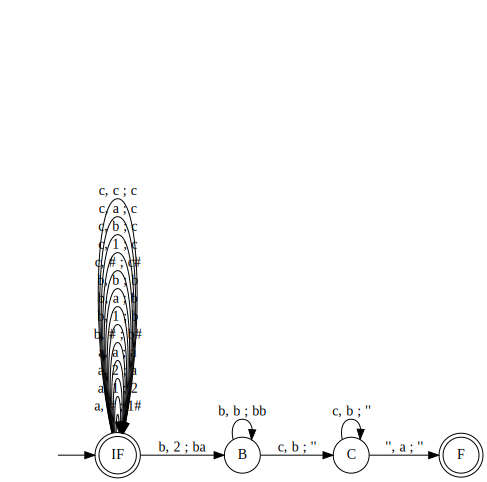

In [569]:
dotObj_pda(Lif)

### Given test cases:

* aa bbb ccc   (accept)

In [570]:
explore_pda('aabbbccc', Lif)

String aabbbccc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'aabbbccc', '#')
->  ('IF', 'abbbccc', '1#')
->  ('IF', 'bbbccc', '2#')
->  ('B', 'bbccc', 'ba#')
->  ('B', 'bccc', 'bba#')
->  ('B', 'ccc', 'bbba#')
->  ('C', 'cc', 'bba#')
->  ('C', 'c', 'ba#')
->  ('C', '', 'a#')
->  ('F', '', '#') .


* aa bbbb cccc (accept)
 

In [571]:
explore_pda('aabbbbcccc', Lif)

String aabbbbcccc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('F', '', '#')
Reached as follows:
->  ('IF', 'aabbbbcccc', '#')
->  ('IF', 'abbbbcccc', '1#')
->  ('IF', 'bbbbcccc', '2#')
->  ('B', 'bbbcccc', 'ba#')
->  ('B', 'bbcccc', 'bba#')
->  ('B', 'bcccc', 'bbba#')
->  ('B', 'cccc', 'bbbba#')
->  ('C', 'ccc', 'bbba#')
->  ('C', 'cc', 'bba#')
->  ('C', 'c', 'ba#')
->  ('C', '', 'a#')
->  ('F', '', '#') .


* aa         (accept)

In [572]:
explore_pda('aa', Lif)

String aa accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '2#')
Reached as follows:
->  ('IF', 'aa', '#')
->  ('IF', 'a', '1#')
->  ('IF', '', '2#') .


* a bbb cccc (accept)

In [573]:
explore_pda('abbbcccc', Lif)

String abbbcccc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', 'c#')
Reached as follows:
->  ('IF', 'abbbcccc', '#')
->  ('IF', 'bbbcccc', '1#')
->  ('IF', 'bbcccc', 'b#')
->  ('IF', 'bcccc', 'b#')
->  ('IF', 'cccc', 'b#')
->  ('IF', 'ccc', 'c#')
->  ('IF', 'cc', 'c#')
->  ('IF', 'c', 'c#')
->  ('IF', '', 'c#') .


* aaa bb c   (accept)

In [574]:
explore_pda('aaabbc', Lif)

String aaabbc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', 'c#')
Reached as follows:
->  ('IF', 'aaabbc', '#')
->  ('IF', 'aabbc', '1#')
->  ('IF', 'abbc', '2#')
->  ('IF', 'bbc', 'a#')
->  ('IF', 'bc', 'b#')
->  ('IF', 'c', 'b#')
->  ('IF', '', 'c#') .


* Epsilon    (accept, as there are zero a's)

In [575]:
explore_pda('', Lif)

String  accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', '#')
Reached as follows:
->  ('IF', '', '#') .


* a bb cc    (accept, as there is no constraint to not match b's and c's if two a's)

In [576]:
explore_pda('abbcc', Lif)

String abbcc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', 'c#')
Reached as follows:
->  ('IF', 'abbcc', '#')
->  ('IF', 'bbcc', '1#')
->  ('IF', 'bcc', 'b#')
->  ('IF', 'cc', 'b#')
->  ('IF', 'c', 'c#')
->  ('IF', '', 'c#') .


* b c must accept too

In [577]:
explore_pda('bc', Lif)

String bc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', 'c#')
Reached as follows:
->  ('IF', 'bc', '#')
->  ('IF', 'c', 'b#')
->  ('IF', '', 'c#') .


* c b        (reject)

In [578]:
explore_pda('cb', Lif)

String cb rejected by your PDA :-(
Visited states are:
{('IF', 'b', 'c#'), ('IF', 'cb', '#')}


* aa bb cc a (reject)

In [579]:
explore_pda('aabbcca', Lif)

String aabbcca rejected by your PDA :-(
Visited states are:
{('B', 'bcca', 'ba#'), ('C', 'ca', 'ba#'), ('C', 'a', 'a#'), ('IF', 'aabbcca', '#'), ('B', 'cca', 'bba#'), ('F', 'a', '#'), ('IF', 'bbcca', '2#'), ('IF', 'abbcca', '1#')}


* a bb a     (reject)

In [580]:
explore_pda('abba', Lif)

String abba rejected by your PDA :-(
Visited states are:
{('IF', 'a', 'b#'), ('IF', 'ba', 'b#'), ('IF', 'abba', '#'), ('IF', 'bba', '1#')}


* ccac       (reject)

In [581]:
explore_pda('ccac', Lif)

String ccac rejected by your PDA :-(
Visited states are:
{('IF', 'ccac', '#'), ('IF', 'ac', 'c#'), ('IF', 'cac', 'c#')}


* abba       (reject)

In [582]:
explore_pda('abba', Lif)

String abba rejected by your PDA :-(
Visited states are:
{('IF', 'a', 'b#'), ('IF', 'ba', 'b#'), ('IF', 'abba', '#'), ('IF', 'bba', '1#')}


* baac       (reject)

In [583]:
explore_pda('baac', Lif)

String baac rejected by your PDA :-(
Visited states are:
{('IF', 'baac', '#'), ('IF', 'aac', 'b#')}


* ac         (accept), as there are no b's  

In [584]:
explore_pda('ac', Lif)

String ac accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', 'c#')
Reached as follows:
->  ('IF', 'ac', '#')
->  ('IF', 'c', '1#')
->  ('IF', '', 'c#') .


* acb (reject)

In [585]:
explore_pda('acb', Lif)

String acb rejected by your PDA :-(
Visited states are:
{('IF', 'b', 'c#'), ('IF', 'cb', '1#'), ('IF', 'acb', '#')}


### Add your test cases below:

In [586]:
# Accept:
explore_pda('abc', Lif)  # pass because all are in the right order
explore_pda('c', Lif)  # pass because all are still in the right order
explore_pda('abbccc', Lif)  # pass because there is only one 'a' and all are in the right order

# Reject
explore_pda('aac', Lif)  # reject because there are 2 a's but not enough b's
explore_pda('accb', Lif)  # reject because the c's come before b's
explore_pda('aabbbbbbcc', Lif)  # reject because there are not enough c's to match the b's

String abc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', 'c#')
Reached as follows:
->  ('IF', 'abc', '#')
->  ('IF', 'bc', '1#')
->  ('IF', 'c', 'b#')
->  ('IF', '', 'c#') .
String c accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', 'c#')
Reached as follows:
->  ('IF', 'c', '#')
->  ('IF', '', 'c#') .
String abbccc accepted by your PDA in 1 ways :-) 
Here are the ways: 
Final state  ('IF', '', 'c#')
Reached as follows:
->  ('IF', 'abbccc', '#')
->  ('IF', 'bbccc', '1#')
->  ('IF', 'bccc', 'b#')
->  ('IF', 'ccc', 'b#')
->  ('IF', 'cc', 'c#')
->  ('IF', 'c', 'c#')
->  ('IF', '', 'c#') .
String aac rejected by your PDA :-(
Visited states are:
{('IF', 'c', '2#'), ('IF', 'aac', '#'), ('IF', 'ac', '1#')}
String accb rejected by your PDA :-(
Visited states are:
{('IF', 'b', 'c#'), ('IF', 'accb', '#'), ('IF', 'ccb', '1#'), ('IF', 'cb', 'c#')}
String aabbbbbbcc rejected by your PDA :-(
Visited states are:
{('C', '', 'bbbba#'), ('B'

# END
